# VGG19 Model Testing

This notebook demonstrates how to test a trained VGG19 model using the training dataset.

In [51]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt


In [52]:
model = load_model('../VGG-19/saved_model/vgg19_trained_model.h5')

In [53]:
test_image_path = '../../Dataset/GTSRB/Test/'

image_indices = [14, 1, 56, 86, 92, 100, 141, 181, 217, 228]

# Initialize an empty list to hold the images
test_images = []

# Load and preprocess the specified images
for index in image_indices:
    img = load_img(f'{test_image_path}{index:05d}.png', target_size=(50, 50))  # Ensure filename has leading zeros
    img_array = img_to_array(img) / 255.0  # Normalize the image
    test_images.append(img_array)

In [54]:
test_images = np.array(test_images)


In [55]:
predictions = model.predict(test_images)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


In [56]:
# print(predictions)

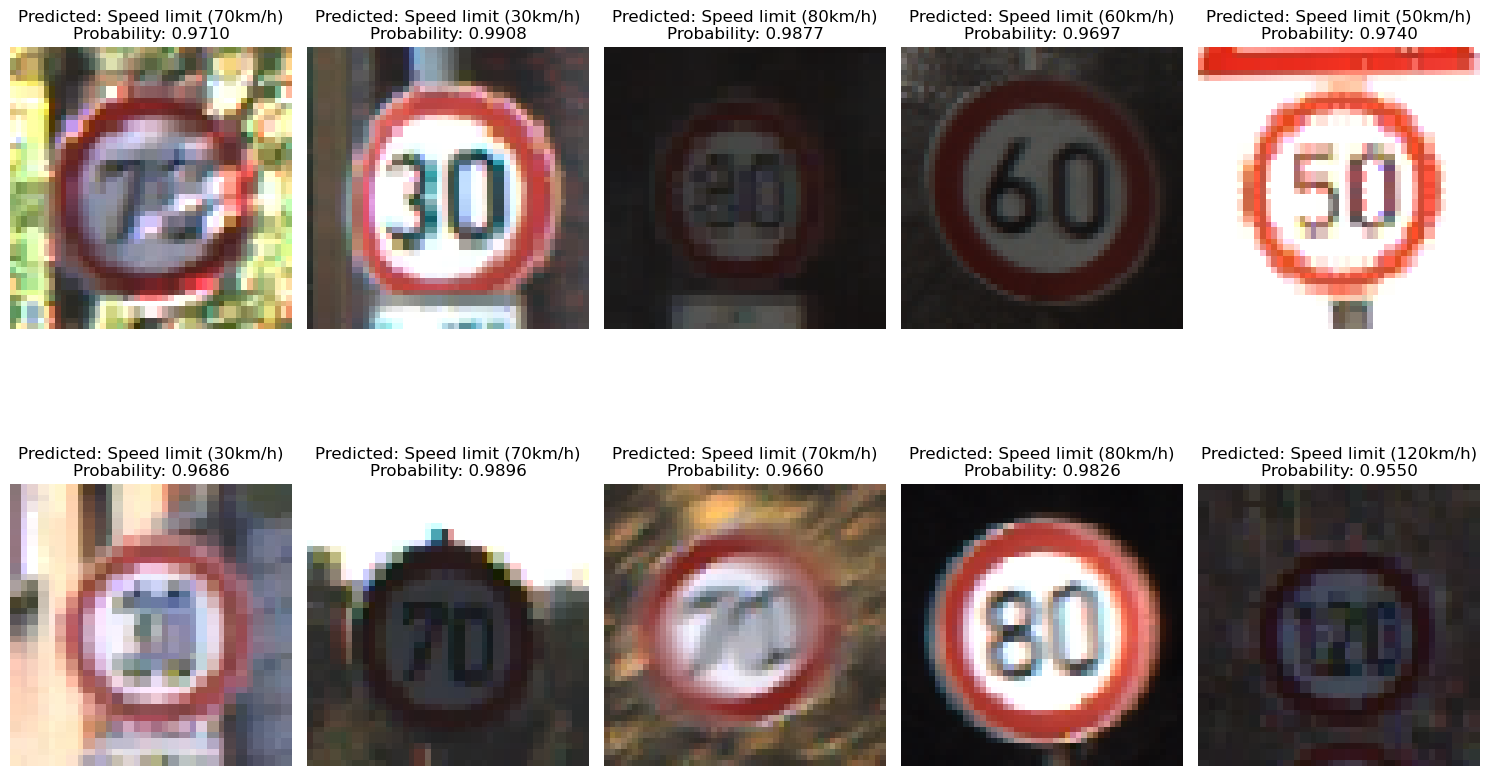

In [57]:
class_labels = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }


# Get predicted class indices
predicted_classes = np.argmax(predictions, axis=1)

# Display images with predictions
plt.figure(figsize=(15, 10))  # Set the figure size

for i in range(len(test_images)):
    plt.subplot(2, 5, i + 1)  # Create a grid of 2 rows and 5 columns
    plt.imshow(test_images[i])  # Display the image
    plt.title(f"Predicted: {class_labels[predicted_classes[i]]}\nProbability: {predictions[i][predicted_classes[i]]:.4f}")  # Show prediction
    plt.axis('off')  # Hide axes

plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot